# Problem 1

#### Shoe Dataset

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Read the data

In [153]:
df_org = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [154]:
df = df_org
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [155]:
df['avg_shoe_price'] = df['order_amount']/df['total_items']

In [156]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_price
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190,112.0
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999,90.0
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595,144.0
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649,156.0
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773,156.0


<AxesSubplot:>

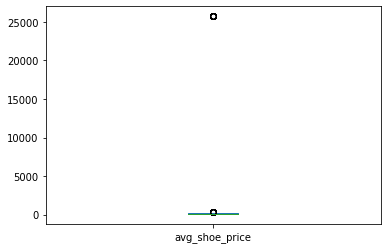

In [157]:
df['avg_shoe_price'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

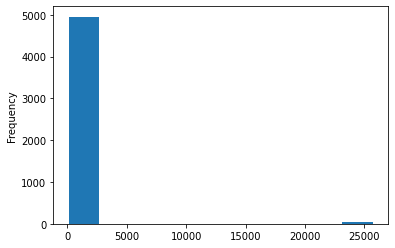

In [158]:
df['avg_shoe_price'].plot(kind = 'hist')

We can observe that there are 46 values of around \\$25,000 for a pair of shoes. Which is around 1% of the total values.

In order to make sense of our analysis, we will need to handle the outlier values. Ideally, we would handle the outliers by replacing the values with mean value, or use a regression model to predict a suitable value. But for the sake of simplicity of this problem we will remove the data points with price of one shoe more than \\$20,000.

In [159]:
df = df[df['avg_shoe_price'] < 20000]

<AxesSubplot:>

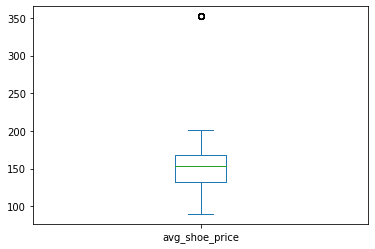

In [160]:
df['avg_shoe_price'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

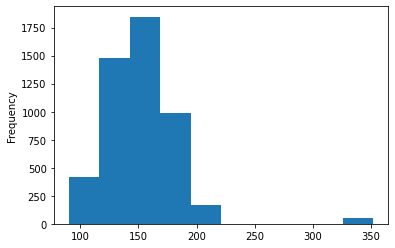

In [161]:
df['avg_shoe_price'].plot(kind = 'hist')

In [162]:
df_org[df_org['avg_shoe_price'] > 300]['shop_id'].unique()

array([42., 78.])

In [163]:
df[df['avg_shoe_price'] > 300].count()

order_id          51
shop_id           51
user_id           51
order_amount      51
total_items       51
payment_method    51
created_at        51
avg_shoe_price    51
dtype: int64

We can see there are 51 observations with shoe price of more than $300. Which is around 1% of total values.

We can handle these outliers by the same way.

In [164]:
#mean_value = df[df['avg_shoe_price'] < 300]['avg_shoe_price'].mean()
#for index, row in df.iterrows():
#    if row['avg_shoe_price'] > 300:
#        df.iloc[index, 3] = row['total_items'] * mean_value
#        df.iloc[index, 7] = mean_value

In [165]:
df = df[df['avg_shoe_price'] < 300]

<AxesSubplot:>

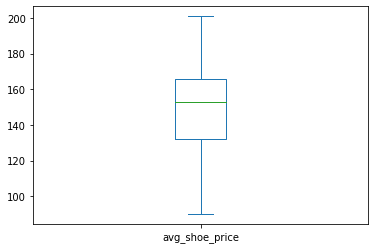

In [166]:
df['avg_shoe_price'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

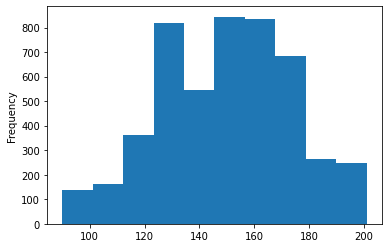

In [167]:
df['avg_shoe_price'].plot(kind = 'hist')

In [168]:
df['order_amount'].mean()

300.1558229655313

In [169]:
df['total_items'].mean()

1.9957169080155006

After making some adjustments in the evaluation of AOV, we can see that the corrected AOV is found to be \\$300. 

Which makes sense considering the metric for average value of a shoe being around \\$150 after removing the outliers with the values of \\$350 and \\$25,000

# Problem 2

#### SQL Dataset

1. SQL Query: <code>SELECT COUNT(*) FROM [Orders] O JOIN [Shippers] S ON O.ShipperID = S.ShipperID WHERE ShipperName = "Speedy Express";</code>

<b>Output:</b> 54

2. SQL Query: <code>SELECT LastName FROM Employees E JOIN (SELECT EmployeeID, COUNT(EmployeeID) AS NUM_ORDERS FROM Orders GROUP BY EmployeeID ORDER BY NUM_ORDERS DESC LIMIT 1) R ON E.EmployeeID = R.EmployeeID;</code>

<b>Output:</b> Peacock

3. SQL Query: <code>SELECT P.ProductID, P.ProductName FROM Products P JOIN (SELECT OD.ProductID, COUNT(OD.ProductID) AS NUM_PRODUCT FROM [Orders] O JOIN (SELECT * FROM Customers WHERE Country = "Germany") C ON C.CustomerID = O.CustomerID JOIN OrderDetails OD ON O.OrderID = OD.OrderID GROUP BY OD.ProductID ORDER BY NUM_PRODUCT DESC LIMIT 1) TEMP ON P.ProductID = TEMP.ProductID</code>

<b>Output:</b> 31, Gorgonzola Telino